In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Fraud.csv')# to read the dataset

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
df.shape

(6362620, 11)

In [11]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest',]].describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,179862.0,833883.0,855114.0,1100702.0,1224996.0
std,142.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13390.0,0.0,0.0,0.0,0.0
50%,239.0,74872.0,14208.0,0.0,132706.0,214661.0
75%,335.0,208721.0,107315.0,144258.0,943037.0,1111909.0
max,743.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0


In [12]:
correlation=df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']].corr()

In [13]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [14]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [15]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


### Data Preprocessing

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [18]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

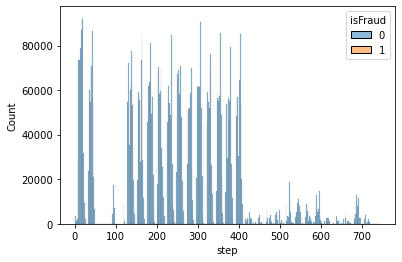

In [19]:
sn.histplot(x='step', data=df,hue='isFraud');

In [20]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

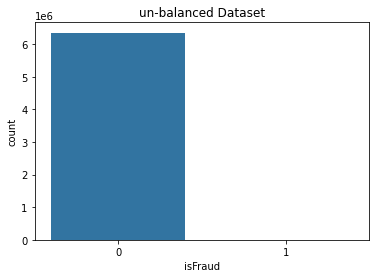

In [21]:
sn.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

This histograph clearly shows that our dataset is highly Un_Balanced.
Because even in real life , the ratio between fraud transc. and normal trans are one side weighted.
Need to handle this , otherwise it will impact our model Training.

In [22]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

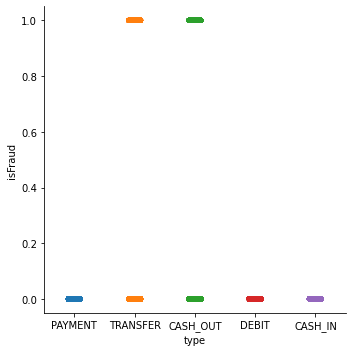

In [23]:
sn.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [24]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [25]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


It is clear that fraudent agents only targeted "CASH_OUT" and "TRANSFER" type of trans. becuase 100% fraud transactions are lie inside these two types.

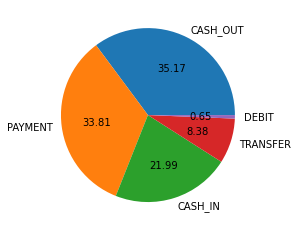

In [26]:
plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT",
due to which fraudulent agents targeted these two type.

In [27]:
per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  603.5
upper limit :-  -112.5


In [28]:
df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.48,C454938739,714218.48,0.0,C482986731,0.00,0.00,1,0
6259933,604,CASH_OUT,714218.48,C1835708623,714218.48,0.0,C1881116283,106940.83,821159.31,1,0
6259934,604,TRANSFER,277582.53,C2144116571,277582.53,0.0,C570246252,0.00,0.00,1,0
6259935,604,CASH_OUT,277582.53,C1512896686,277582.53,0.0,C731882373,0.00,277582.53,1,0
6259936,604,TRANSFER,4672401.04,C801580496,4672401.04,0.0,C1917884973,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


There are more than 100 thousand records considered as outlier in "step" feature .
we can't remove these records , because of value.
and ,
other independent features (numeric ) are denotes amount ( money transaction ),
thus removing these column is not good option.
becuase higher amount may have higher probability to denote fraud transaction.

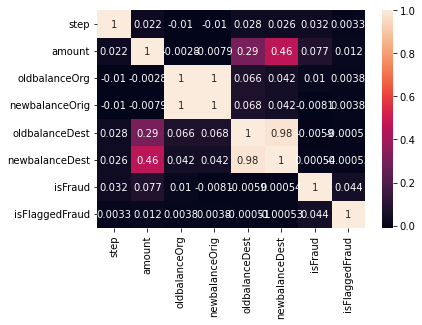

In [29]:
sn.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

1) Their is multi_collinearity between 4 independent features

( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766
( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988
Need to remove one from each of two correlation

2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest',
becuase they are less correlated with dependent feature ( "isFraud"),
as compare to other two one.

### Feature selection

In [30]:
# function which returns un_important features ( only numeric ).

def correlation(dataset,threshold):
    
    """ 
    used to store un_important column names
    and set() type stores only unique values
    so, that no duplicated column name will store.
    """
    column_corr=set()
    
    # storing correlation matrix
    corr_matrix=dataset.corr()
    
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            
            # comparing corr. values with threshold
            if corr_matrix.iloc[i,j]>threshold:
                
                # if true, then fateching column name
                colname=corr_matrix.columns[i]
                
                # adding column name to column_corr variable.
                column_corr.add(colname)
    return column_corr

In [31]:
# calling ... with threshold value 0.9
correlated_features=correlation(df,0.9)

In [32]:
len(set(correlated_features))

2

In [33]:
# name of these columns ( independent features)
correlated_features

{'newbalanceDest', 'newbalanceOrig'}

In [34]:
# Removing these features from DataFrame.

df=df.drop(correlated_features,axis=1)

In [35]:
#after removing
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


In [36]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

### True :- having variations

### False :- not having variations

In [38]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

In [39]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
nameDest           object
oldbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [40]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())

 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [41]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [42]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [43]:
df=df.drop({'nameOrig','nameDest'},axis=1)

### Feature Encoding

There is only one categorical column ( feature ) which is "type"

In [44]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [45]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

We will replace large count class with bigger numeric number,
so, it will helps model for batter understanding of data pattern while training

In [46]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [47]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.0,0.0,0,0
1,1,4,1864.28,21249.0,0.0,0,0
2,1,2,181.00,181.0,0.0,1,0
3,1,5,181.00,181.0,21182.0,1,0
4,1,4,11668.14,41554.0,0.0,0,0


In [48]:
df["type"].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [49]:
df["type"].value_counts()

5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: type, dtype: int64

### Handling Un-Balanced Data

In [50]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [51]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [52]:
normal_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.0,0.0,0,0
1,1,4,1864.28,21249.0,0.0,0,0
4,1,4,11668.14,41554.0,0.0,0,0
5,1,4,7817.71,53860.0,0.0,0,0
6,1,4,7107.77,183195.0,0.0,0,0


In [53]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0,181.0,0.0,1,0
3,1,5,181.0,181.0,21182.0,1,0
251,1,2,2806.0,2806.0,0.0,1,0
252,1,5,2806.0,2806.0,26202.0,1,0
680,1,2,20128.0,20128.0,0.0,1,0


In [54]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


In [55]:
# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=8213)

In [56]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 7)
(8213, 7)


In [57]:
normal_transaction['amount'].describe()

count    8.213000e+03
mean     1.833315e+05
std      6.366311e+05
min      7.000000e-01
25%      1.359966e+04
50%      7.506440e+04
75%      2.063882e+05
max      2.411558e+07
Name: amount, dtype: float64

In [58]:
fraud_transaction['amount'].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [59]:
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [60]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
5426494,378,5,24374.58,0.0,37071.71,0,0
843429,41,5,546769.47,318244.6,0.00,0,0
628032,34,4,5801.62,48977.0,0.00,0,0
4451243,323,4,6094.17,0.0,0.00,0,0
3561488,260,5,188715.91,2303.0,5945810.99,0,0


In [61]:
new_df.tail()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.13,339682.13,0.00,1,0
6362616,743,2,6311409.28,6311409.28,0.00,1,0
6362617,743,5,6311409.28,6311409.28,68488.84,1,0
6362618,743,2,850002.52,850002.52,0.00,1,0
6362619,743,5,850002.52,850002.52,6510099.11,1,0


In [62]:
new_df.shape

(16426, 7)

In [63]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [64]:
X.shape

(16426, 6)

In [65]:
y.shape

(16426,)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# stratify will evenly distribute the data values

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [68]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (13140, 6)
x-test :-   (3286, 6)
y-train :-  (13140,)
y-test :-   (3286,)


In [69]:
y_test.value_counts()

0    1643
1    1643
Name: isFraud, dtype: int64

In [70]:
y_train.value_counts()

1    6570
0    6570
Name: isFraud, dtype: int64

Our "isFraud" values are evenly distributed amoungs training and testing data.

### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()

In [73]:
scaler.fit(x_train)

StandardScaler()

In [74]:
x_train_scaler=scaler.transform(x_train)

In [75]:
x_test_scaler=scaler.transform(x_test)

In [76]:
x_train_scaler

array([[-0.58944717, -1.33286578, -0.38211488, -0.34877577, -0.25090406,
        -0.0302337 ],
       [-0.30035696, -1.33286578, -0.29753254, -0.29907284, -0.25090406,
        -0.0302337 ],
       [ 1.95041679,  0.99775741,  4.91200998,  2.7621994 , -0.23399374,
        -0.0302337 ],
       ...,
       [-0.04224071, -0.55599139, -0.26217029,  4.53013841,  0.55094831,
        -0.0302337 ],
       [ 0.38623228,  0.99775741,  0.3417982 ,  0.07661571, -0.25090406,
        -0.0302337 ],
       [ 0.83535456,  0.99775741,  1.92253898,  1.005503  , -0.19421641,
        -0.0302337 ]])

In [77]:
x_test_scaler

array([[-0.24873371,  0.22088301, -0.44056791, -0.36080928, -0.25090406,
        -0.0302337 ],
       [-0.62558344, -0.55599139, -0.39242016, -0.1622169 , -0.14634533,
        -0.0302337 ],
       [-0.37779184,  0.22088301, -0.44230841, -0.33594434, -0.25090406,
        -0.0302337 ],
       ...,
       [-0.50168764, -0.55599139, -0.41120058, -0.37361772, -0.25090406,
        -0.0302337 ],
       [-0.25389603, -0.55599139, -0.3372505 ,  0.27735001,  1.13271754,
        -0.0302337 ],
       [-1.31217268,  0.99775741, -0.38968323, -0.35322315, -0.24223943,
        -0.0302337 ]])

### Training and Evaluating model

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train_scaler,y_train)

LogisticRegression()

In [79]:
y_pred=log_reg.predict(x_test_scaler)

In [80]:
from sklearn.metrics import accuracy_score
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
77.78454047474132
- - - - - - - - - - -


## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rand_model=RandomForestClassifier()
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [82]:
y_pred=rand_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
98.56968959220937
- - - - - - - - - - -


## Support Vector Machine

In [83]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train_scaler,y_train)

SVC()

In [84]:
y_pred=svm_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
89.56177723676203
- - - - - - - - - - -


## Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaler, y_train)

DecisionTreeClassifier()

In [86]:
y_pred=dt.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
97.68715763846622
- - - - - - - - - - -


## Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(x_train_scaler,y_train)

GaussianNB()

In [88]:
y_pred=gnb_model.predict(x_test_scaler)
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
56.26902008520999
- - - - - - - - - - -


#### Conclusion
Random Forest Classifier Selected

## Preparing Model for deployment

In [89]:
import pickle

In [90]:
pickle.dump(rand_model,open('model.sav','wb'))

In [91]:
#### Saving the StandadrdScaler object 'scaler'

pickle.dump(scaler,open('scaler.sav','wb'))

Let's check whether our model working fine or not ?

In [92]:
rand_model=pickle.load(open('model.sav','rb'))

In [93]:
# loading the scaler file for scaling input array
new_scaler=pickle.load(open('scaler.sav','rb'))

In [94]:
new_df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
5426494,378,5,24374.58,0.0,37071.71,0,0
843429,41,5,546769.47,318244.6,0.00,0,0
628032,34,4,5801.62,48977.0,0.00,0,0
4451243,323,4,6094.17,0.0,0.00,0,0
3561488,260,5,188715.91,2303.0,5945810.99,0,0


In [95]:
# creating ndarray to pass this array as an input data
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

array([[2.2800000e+02, 5.0000000e+00, 1.1756311e+05, 0.0000000e+00,
        2.0890841e+05, 0.0000000e+00]])

In [96]:
# scaling the input_array datapoints

input_array_scale=new_scaler.transform(input_array)
input_array_scale

C:\Users\F1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.40876579,  0.99775741, -0.37981767, -0.38441849, -0.18797974,
        -0.0302337 ]])

In [97]:
pred=rand_model.predict(input_array_scale)
pred

array([0], dtype=int64)

### Final Conclusion
1) There is no missing or duplicate values in this dataset.

2) Having outliers, but it is not good idea to remove them,becuase higher values of amount and account balance having higher porbability to denote fraud transactions.

3) some columns having multi_collinearity, thus removed one of them.

4) "amount" , "isFlaggedFraud" are key features, they impact the Fraud prediction.means we need to focused on large transcation and condition where "amount"=="oldbalanceOrig"

5) Best option is to deploy this model on Cloud server,and automate this ml model using cloud services.

### Questions:¶
1. Data Cleaning:
Missing Values: No missing data found.
Outliers: Identified outliers in time data, but not removed.
Multi-Collinearity: Fixed by removing correlated features.


2. Fraud Detection Model:
The reason I chose Random forest Classifier As best model because it has greater accuracy than other classifiers.


3. Variable Selection:
Removed correlated features and those with low variations.


4. Model Performance:
Random Forest had the highest accuracy among tested models.


5. Key Factors Predicting Fraud:
High transaction amounts and flagged transactions indicate fraud.


6. Reasoning for Key Factors:
Yes, these factors make sense:

Transaction Amount: Large or unusual amounts can indicate fraud.
Balance Changes: Significant changes in balances might signal unauthorized transactions.
Transaction Type: Certain transaction types might be more prone to fraud


7. Prevention Strategies:
Monitor high-value transactions and update security measures.


8. Evaluating Prevention Measures:
Monitor Fraud Rates: Track the fraud rates before and after implementation.
User Feedback: Gather feedback from users on the new security measures.
Performance Metrics: Continuously monitor model performance metrics